In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,accuracy_score, classification_report, confusion_matrix

df=pd.read_csv(r"C:\Users\monal\Desktop\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.shape

(205, 26)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [10]:
df_modified=df[['symboling','fueltype','aspiration','doornumber','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
df_modified.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [73]:
df_modified=pd.get_dummies(df_modified,drop_first=True)
df_modified.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
from sklearn.model_selection import train_test_split
x=df_modified
y = df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,test_size=0.8,random_state=0)



In [74]:
x_train.shape

(41, 40)

In [75]:
x_test.shape

(164, 40)

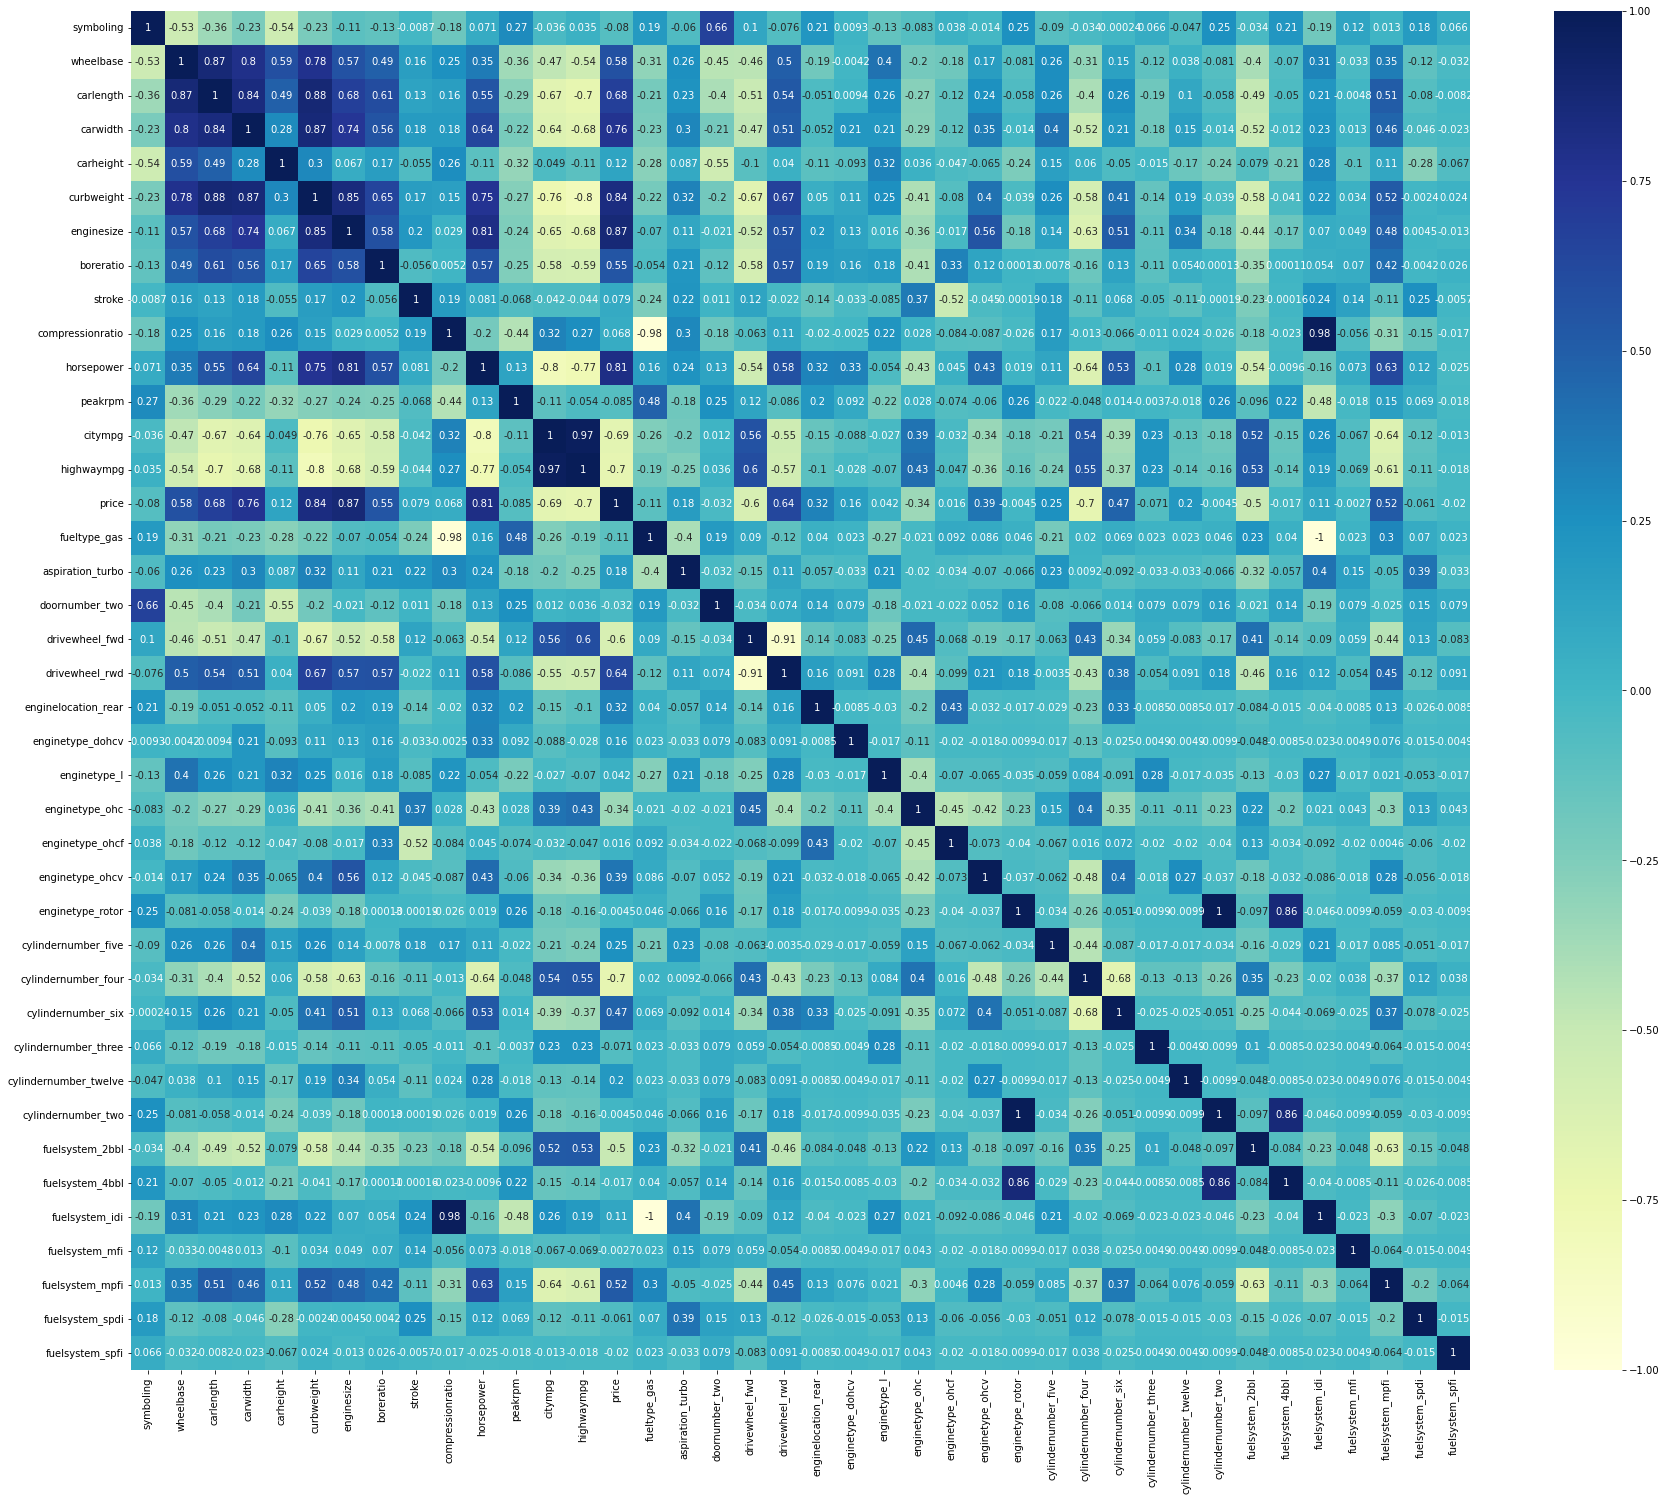

In [14]:
plt.figure(figsize=(30,25))
sns.heatmap(df_modified.corr(),annot=True,cmap="YlGnBu")
plt.show()


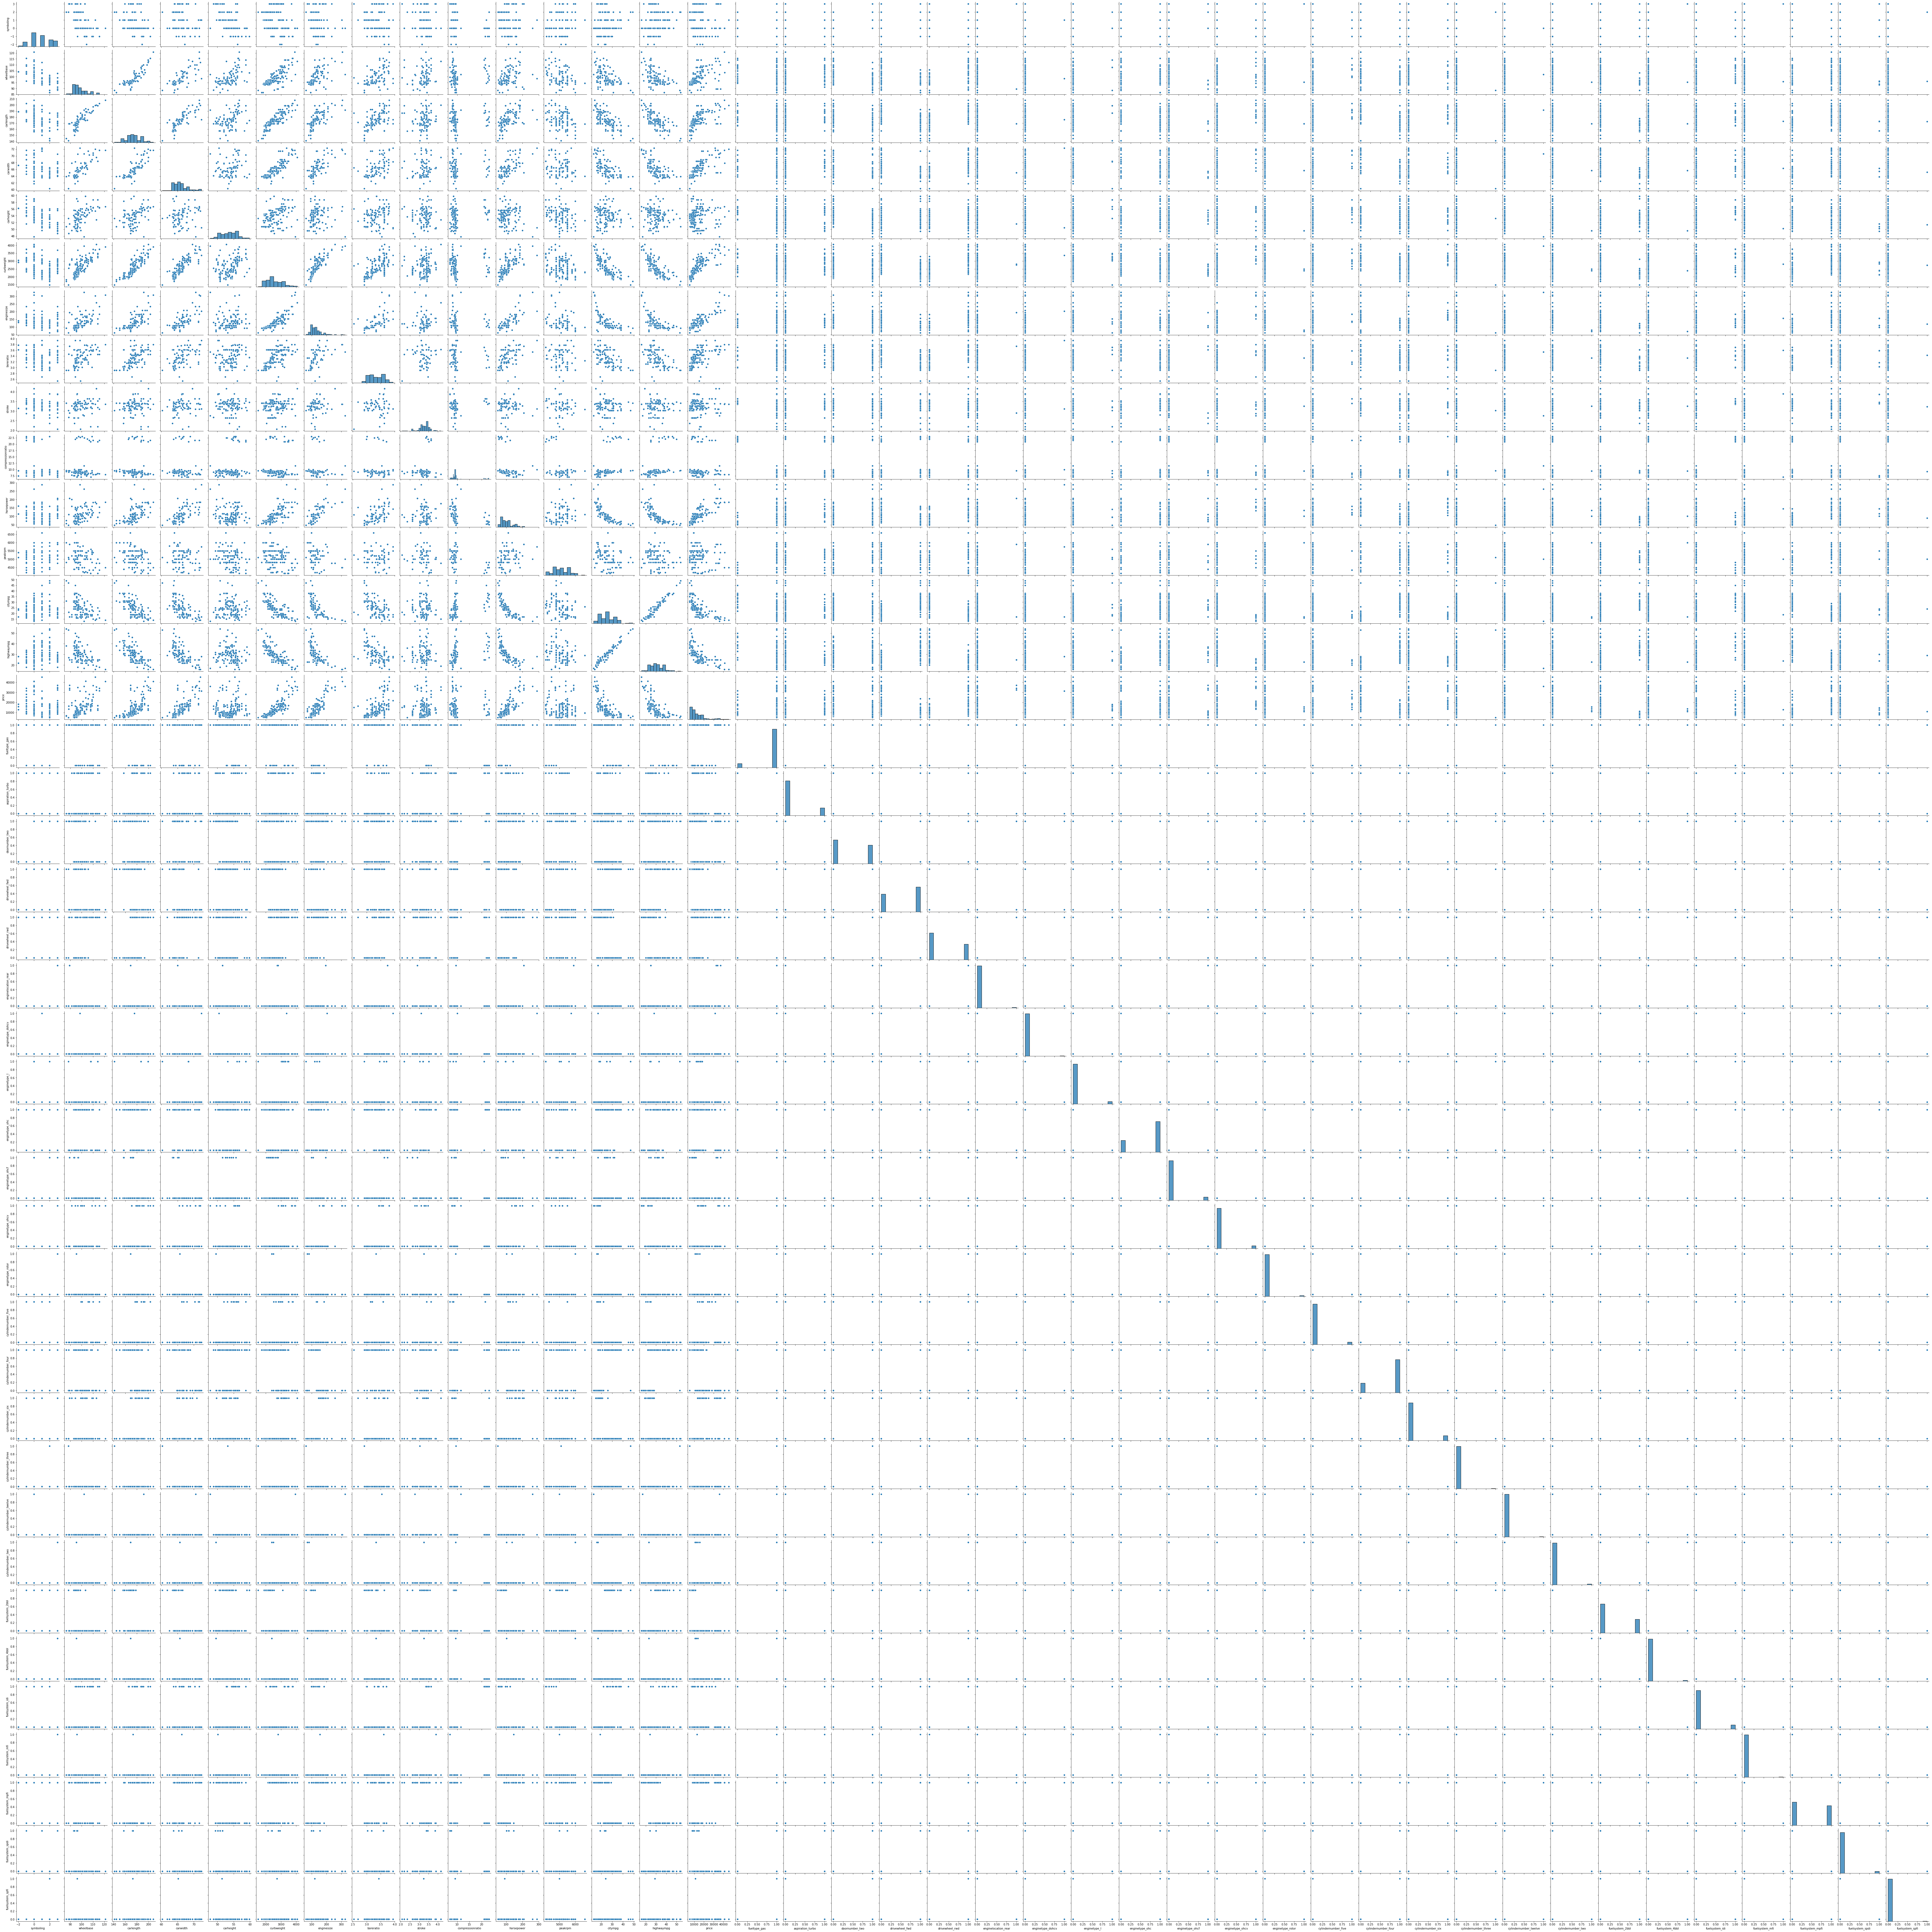

In [61]:
sns.pairplot(df_modified)


In [ ]:
Testing Different Models


In [65]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [19]:
lr.coef_

array([ 7.65402087e-13,  1.00652819e-12,  5.03990946e-13, -4.43981418e-12,
        4.38081862e-13, -3.10862447e-14,  4.98671850e-13, -1.58518388e-11,
       -1.34877746e-11,  6.35393344e-12,  1.43888373e-13,  1.94289029e-15,
       -9.81120784e-13,  9.79787703e-13,  1.00000000e+00,  3.71064910e-11,
       -3.52209115e-12,  2.32810971e-12, -6.27710676e-12, -1.63323546e-11,
       -3.35037576e-11, -4.23516474e-21,  1.90276541e-11,  8.37632779e-13,
       -5.00971145e-13, -9.38285414e-12,  8.51349541e-12,  7.81149426e-12,
        4.50541590e-12, -1.64537757e-11,  3.38813179e-21, -2.54109884e-21,
        8.51349540e-12, -1.49096195e-12,  0.00000000e+00, -3.71064903e-11,
        1.18850341e-11,  2.38738887e-12,  1.13809219e-11,  0.00000000e+00])

In [72]:
y_pred=lr.predict(x_test)
print('MSE=',mean_squared_error(y_pred, y_test))
print('RMSE=',np.sqrt(mean_squared_error(y_pred, y_test)))



MSE= 1.4767191447760698e-22
RMSE= 1.2152033347452885e-11


In [79]:
r2_score(y_pred, y_test)

0.9962265036512994

In [91]:
#LassoRegression
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.4)
l.fit(x_train, y_train)
y_pred= l.predict(x_test)
mean_squared_error(y_pred, y_test)
from sklearn.metrics import r2_score 
print(r2_score(y_test, y_pred))
print('MSE=',mean_squared_error(y_pred, y_test))
print('RMSE=',np.sqrt(mean_squared_error(y_pred, y_test)))

0.9999984220980321
MSE= 100.63488468380562
RMSE= 10.031694008680967


In [81]:
r2_score(y_pred, y_test)

0.9962265036512994

In [96]:
#RidgeRegression
from sklearn.linear_model import Ridge
r = Ridge(alpha =0.001)
y_pred=lr.predict(x_test)
#rng = np.random.RandomState(0)
#n_samples, n_features = 15, 10
#y = rng.randn(n_samples)
#X = rng.randn(n_samples, n_features)
r.fit(x_train, y_train)
print('MSE=',mean_squared_error(y_pred, y_test))
print('RMSE=',np.sqrt(mean_squared_error(y_pred, y_test)))


1.0
MSE= 1.4767191447760698e-22
RMSE= 1.2152033347452885e-11


In [101]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x_train, y_train)
print('MSE=',mean_squared_error(y_pred, y_test))
print('RMSE=',np.sqrt(mean_squared_error(y_pred, y_test)))

MSE= 1.4767191447760698e-22
RMSE= 1.2152033347452885e-11
